# Project: Comcast Telecom Consumer Complaints

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comCast = pd.read_csv('~/Comcast_telecom_complaints_data.csv')

In [4]:
comCast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
comCast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
comCast.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [8]:
comCast.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
comCast.shape

(2224, 11)

## 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [10]:
# Convert to datetime

comCast["Date"] = pd.to_datetime(comCast['Date'])
comCast["Date_month_year"] = pd.to_datetime(comCast['Date_month_year'])
comCast.sort_values(by=['Date_month_year'], inplace=True)
comCast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
1160,211472,comcast cable,2015-04-01,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No
767,213355,Comcast is ignoring me now. They are making NO...,2015-04-01,2015-01-04,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No
2143,213198,Fradulent Services,2015-04-01,2015-01-04,8:56:38 PM,Customer Care Call,Waukegan,Illinois,60085,Closed,No
268,212818,Incorrect Billing,2015-04-01,2015-01-04,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No
908,211904,Unable to get in touch with anyone that has th...,2015-04-01,2015-01-04,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No


In [12]:

srDate = pd.Series(comCast["Date_month_year"])
srDate
comCast["Month_Name"] = sr_Date.dt.month_name()
comCast.sample(n=6)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_Name
376,267602,Comcast overcharging,2015-04-30,2015-04-30,8:48:20 PM,Internet,Chatham,New Jersey,7928,Closed,No,April
673,358340,Comcast Price Gouging,2015-06-23,2015-06-23,1:28:17 PM,Internet,Everett,Washington,98201,Open,No,June
1290,238264,Comcast,2015-04-15,2015-04-15,9:08:43 PM,Customer Care Call,Milford,Michigan,48380,Closed,No,April
1464,319428,comcast,2015-06-02,2015-02-06,4:53:23 PM,Customer Care Call,Ocala,Florida,34472,Solved,No,February
1432,305998,Internet problems,2015-05-25,2015-05-25,3:52:34 PM,Customer Care Call,North Miami,Florida,33181,Solved,No,May
334,306406,service issues,2015-05-26,2015-05-26,9:13:17 AM,Customer Care Call,Canton,Georgia,30114,Solved,No,May


In [13]:
month_Total_Tickets = comCast.groupby(['Month_Name'],sort=False)['Ticket #'].count()

In [14]:
month_Total_Tickets

Month_Name
January        55
February       59
March          45
April         375
May           317
June         1046
July           49
August         67
September      55
October        53
November       38
December       65
Name: Ticket #, dtype: int64

In [16]:
month_List = comCast["Month_Name"].unique()
month_List

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

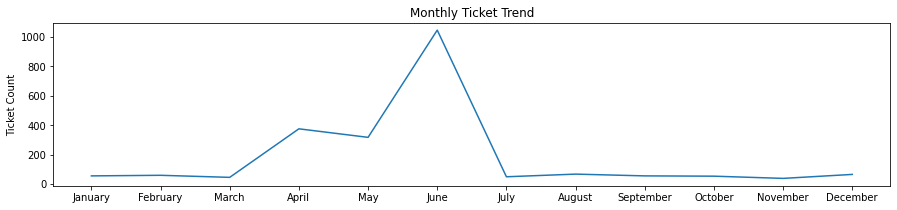

In [17]:
plt.figure(figsize=(15, 3))
plt.ylabel("Ticket Count")
plt.title("Monthly Ticket Trend")
plt.plot(month_List,month_Total_Tickets)

In [19]:
daily_Total_Tickets = comCast.groupby(['Date_month_year'],sort=False)['Ticket #'].count()
daily_Total_Tickets.sample(n=10)

Date_month_year
2015-05-06     29
2015-06-24    218
2015-08-05     15
2015-06-22     30
2015-05-05     14
2015-06-15     34
2015-03-05      5
2015-07-04     25
2015-05-13     12
2015-04-14     23
Name: Ticket #, dtype: int64

In [20]:
daily_Total_Tickets

Date_month_year
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Name: Ticket #, Length: 91, dtype: int64

In [22]:
date_List = comCast["Date_month_year"].unique()
date_List

array(['2015-01-04T00:00:00.000000000', '2015-01-05T00:00:00.000000000',
       '2015-01-06T00:00:00.000000000', '2015-02-04T00:00:00.000000000',
       '2015-02-05T00:00:00.000000000', '2015-02-06T00:00:00.000000000',
       '2015-03-04T00:00:00.000000000', '2015-03-05T00:00:00.000000000',
       '2015-03-06T00:00:00.000000000', '2015-04-04T00:00:00.000000000',
       '2015-04-05T00:00:00.000000000', '2015-04-06T00:00:00.000000000',
       '2015-04-13T00:00:00.000000000', '2015-04-14T00:00:00.000000000',
       '2015-04-15T00:00:00.000000000', '2015-04-16T00:00:00.000000000',
       '2015-04-17T00:00:00.000000000', '2015-04-18T00:00:00.000000000',
       '2015-04-19T00:00:00.000000000', '2015-04-20T00:00:00.000000000',
       '2015-04-21T00:00:00.000000000', '2015-04-22T00:00:00.000000000',
       '2015-04-23T00:00:00.000000000', '2015-04-24T00:00:00.000000000',
       '2015-04-25T00:00:00.000000000', '2015-04-26T00:00:00.000000000',
       '2015-04-27T00:00:00.000000000', '2015-04-28

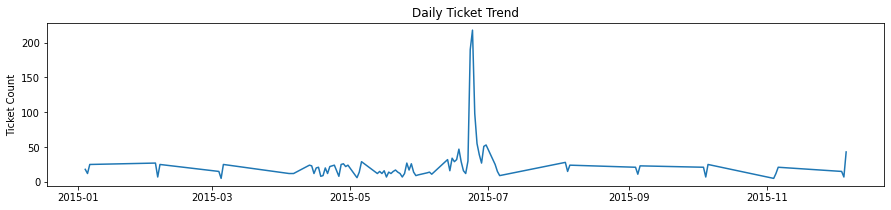

In [24]:

plt.figure(figsize=(15, 3))
plt.ylabel("Ticket Count")
plt.title("Daily Ticket Trend")
plt.plot(date_List,daily_Total_Tickets)

Insights:
1. Maximum number of complaints registered nearly May and July 2017
2. Mostly June 2017 has the highest registered complaints

## 2. Provide a table with the frequency of complaint types.

In [25]:

comCast["Customer Complaint"] = comCast["Customer Complaint"].astype('category')

In [26]:
def complaintType(row):
    if (row["Customer Complaint"]).lower().find("bill") != -1:
        return "Billing Issue"
    elif (row["Customer Complaint"]).lower().find("network") != -1:
        return "Network Issue"
    elif (row["Customer Complaint"]).lower().find("data") != -1:
        return "Data Issue"    
    elif (row["Customer Complaint"]).lower().find("service") != -1:
        return "Service Issue"
    else:
        return "Other"

In [28]:
comCast["Complaint_Type"] = comCast.apply(lambda row: complaintType(row), axis=1)

In [29]:
complaintsFrequency = comCast.groupby(['Complaint_Type'],sort=False)['Ticket #'].count()
complaintsFrequency

Complaint_Type
Other            1228
Service Issue     402
Billing Issue     379
Data Issue        213
Network Issue       2
Name: Ticket #, dtype: int64

Insights

1. From the above frequency, other category has maximum number of complaints registered
2. To improve the customer centric business process, it is better to create further more categories based on customer's keywords

## 3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [30]:
def complaintStatus(row):
    if row["Status"] == "Open" or row["Status"] == "Pending":
        return "Open"
    elif row["Status"] == "Closed" or row["Status"] == "Solved":
        return "Closed"

In [31]:
comCast["Status"] = comCast["Status"].astype('category')

In [33]:

comCast["Complaint_Status"] = comCast.apply(lambda row: complaintStatus(row), axis=1)
comCast.sample(n=7)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month_Name,Complaint_Type,Complaint_Status
1788,359252,Refund issues,2015-06-23,2015-06-23,4:29:21 PM,Customer Care Call,San Jose,California,95132,Solved,No,June,Other,Closed
1305,271592,Transfer of services,2015-05-04,2015-04-05,1:18:44 PM,Internet,Miramar,Florida,33025,Solved,No,April,Service Issue,Closed
1034,comcas,nd intrenal miscommunication,2015-04-30,2015-04-30,9:55:33 PM,Customer Care Call,Kingston Springs,Tennessee,37082,Closed,No,April,Other,Closed
599,263790,Denial of Refund for Overpayment,2015-04-29,2015-04-29,11:53:57 AM,Customer Care Call,Douglasville,Georgia,30135,Closed,No,April,Other,Closed
1586,360170,"expensive service, capped",2015-06-23,2015-06-23,9:16:34 PM,Customer Care Call,Pleasanton,California,94566,Solved,No,June,Service Issue,Closed
2109,360636,Internet Speeds are Wacko,2015-06-24,2015-06-24,12:32:32 AM,Internet,Walnut Creek,California,94595,Solved,No,June,Other,Closed
206,235996,Comcast Blocking HBOGo on PS4,2015-04-14,2015-04-14,9:08:59 PM,Customer Care Call,Belmont,California,94002,Closed,No,April,Other,Closed


## 4. Provide state wise status of complaints in a stacked bar chart.

### a. Which state has the maximum complaints

In [34]:

state = pd.crosstab(comCast.State, comCast.Complaint_Status)
state

Complaint_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'Status of Complaints by State'}, xlabel='State'>

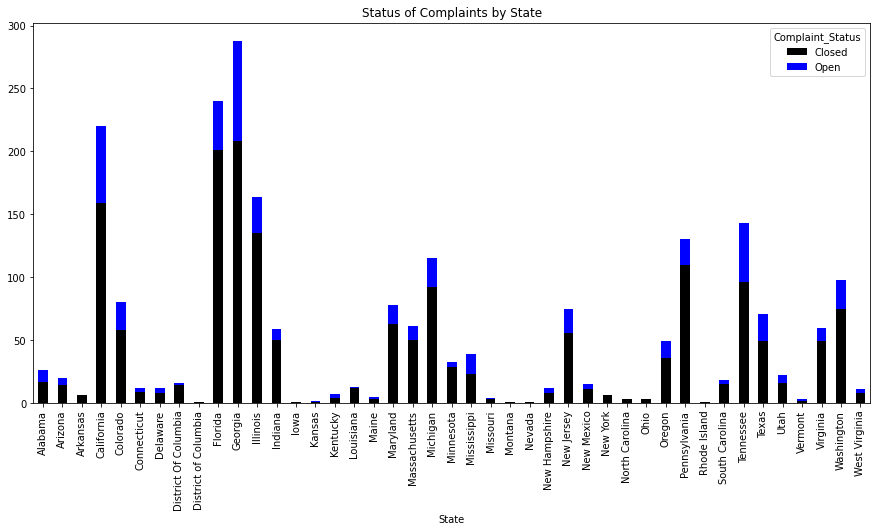

In [37]:
state.plot.bar(color = ['black','blue'], stacked = True, figsize = (15,7), title = "Status of Complaints by State")

In [38]:
stateType = pd.crosstab(comCast.State, comCast.Complaint_Type)
stateType

Complaint_Type,Billing Issue,Data Issue,Network Issue,Other,Service Issue
State,,,,,
Alabama,0,10,0,10,6
Arizona,3,12,0,3,2
Arkansas,0,0,0,6,0
California,34,0,0,150,36
Colorado,14,1,0,54,11
Connecticut,0,0,0,5,7
Delaware,2,0,0,8,2
District Of Columbia,6,0,0,7,3
District of Columbia,0,0,0,1,0


<AxesSubplot:title={'center':'Type of Complaints by State'}, xlabel='State'>

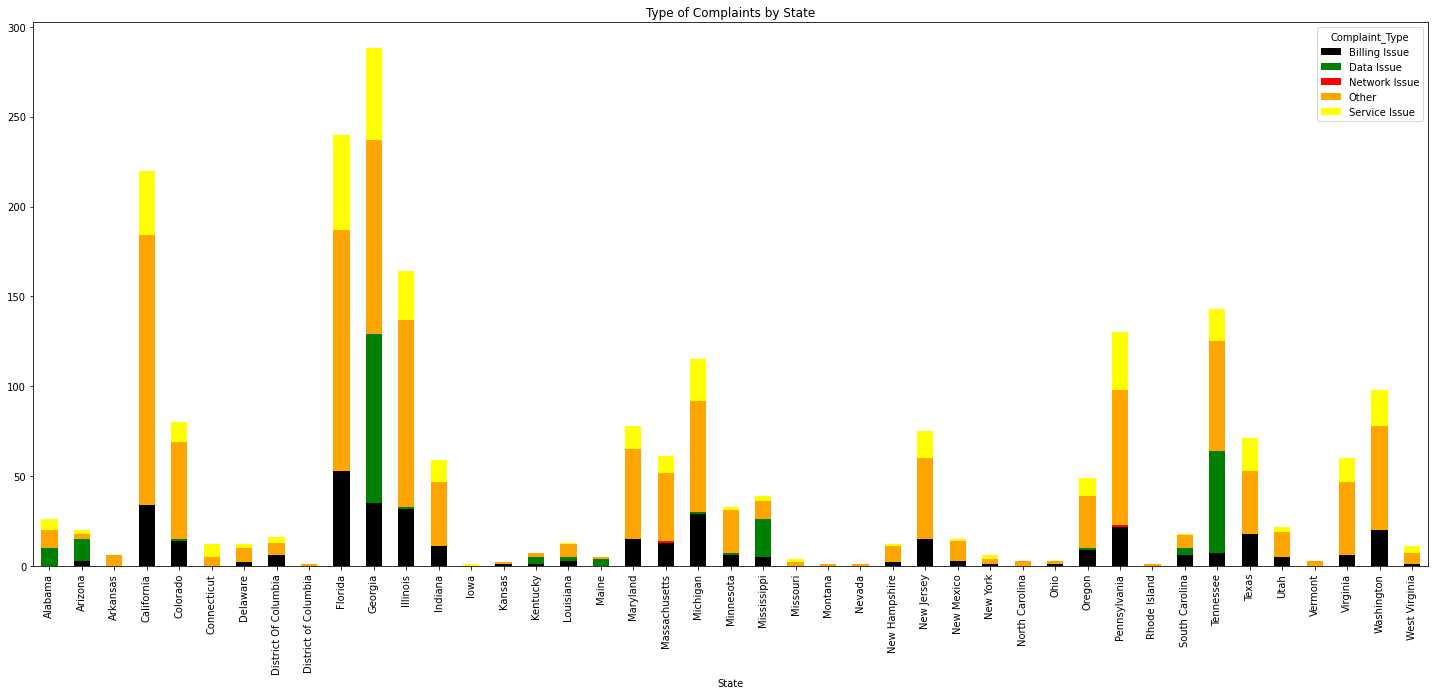

In [39]:
stateType.plot.bar(color = ['black','green','red','orange','yellow'], stacked = True, figsize = (25,10), title = "Type of Complaints by State")

Insight
- From the visualization, stacked bar chart, Georgia state has maximum complaints 
- Grorgia has 80 open status reports, need to improve business process in Georgia 

### b. Which state has the highest percentage of unresolved complaints

In [40]:
unresolvedState = (comCast[(comCast.Complaint_Status == "Open")])[['Ticket #','State','Complaint_Status',]]
unresolved = pd.DataFrame(unresolvedState.groupby('State')['Ticket #'].count().sort_values(ascending = False)).reset_index()
unresolved.rename(columns={'Ticket #':'Open_Ticket_Count'}, inplace=True)

In [41]:
unresolved["Total_Ticket_Count"]=unresolved.apply(lambda row: comCast[(comCast.State == row["State"])].shape[0], axis=1)

In [42]:
unresolved["PercentUnresolved"]=unresolved.apply(lambda row: (row["Open_Ticket_Count"]/comCast.shape[0])*100, axis=1)
unresolved.sort_values(by="PercentUnresolved",ascending = False)

,State,Open_Ticket_Count,Total_Ticket_Count,PercentUnresolved
0,Georgia,80,288,3.597122
1,California,61,220,2.742806
2,Tennessee,47,143,2.113309
3,Florida,39,240,1.753597
4,Illinois,29,164,1.303957
5,Michigan,23,115,1.034173
6,Washington,23,98,1.034173
7,Colorado,22,80,0.989209
8,Texas,22,71,0.989209
9,Pennsylvania,20,130,0.899281


Insight

- From the above table, Georgia has maximum percentage of unresolved complaints compared to other states

## 5. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [46]:
resolved = (comCast[(comCast.Complaint_Status == "Closed")])[['Ticket #','Complaint_Status','Received Via']]
resolved = pd.DataFrame(resolved.groupby('Received Via')['Ticket #'].count().sort_values(ascending = False)).reset_index()
resolved.rename(columns={'Ticket #':'Closed_Ticket_Count'}, inplace=True)
resolved["PercentResolved"]=resolved.apply(lambda row: (row["Closed_Ticket_Count"]/comCast.shape[0])*100, axis=1)
resolved

,Received Via,Closed_Ticket_Count,PercentResolved
0,Customer Care Call,864,38.848921
1,Internet,843,37.904676


Insights

- From above table aggregation of 1707 complaints resolved which is 77% overall 2224 complaints